## Student Performance Indicator

#### Life cycle of Machine learning Project:

Understanding the Problem Statement

Data Collection

Data Checks to perform

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model

1) Problem statement:
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    
The data consists of 8 column and 1000 rows.

In [1]:
## Import data and Required Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.getcwd()

'c:\\End_To_End_Project\\MlProject\\notebook'

In [3]:
os.chdir("C:\\practices\\notebook\\data")

In [4]:
os.getcwd()

'C:\\practices\\notebook\\data'

In [5]:
os.listdir()

['stud.csv']

In [6]:
## import csv data as pandas DataFrame
df=pd.read_csv('stud.csv')

In [7]:
## Shape of the dataSet
df.shape

(1000, 8)

In [8]:
## Top 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset information

#### gender : sex of students -> (Male/female)
#### race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
#### parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
#### lunch : having lunch before test (standard or free/reduced)
#### test preparation course : complete or not complete before test
#### math score
#### reading score
#### writing score



## 3. Data Checks to perform

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

In [10]:
df.duplicated().sum()

0

There are no duplicates values in the data set

In [11]:
## Check Null and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
## Check the number of unique values of each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
## Check Statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data¶

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("categories in 'gender' variable:   ",end=' ')
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:  ",end=' ')
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:  ",end=' ')
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:  ",end=' ')
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:  ",end=' ')
print(df['test_preparation_course'].unique())



categories in 'gender' variable:    ['female' 'male']
categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:   ['none' 'completed']


In [16]:
## define Numerical And Categorical columns:

numeric_columns=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_columns=[feature for feature in df.columns if df[feature].dtype =='O']

## Print
print("We have {} Numerical columns:".format(len(numeric_columns)),numeric_columns)
print("We have {} Categorical columns:".format(len(categorical_columns)),categorical_columns)

We have 3 Numerical columns: ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### Adding columns for "Total Score" and "Average"

In [18]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [19]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [20]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [21]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


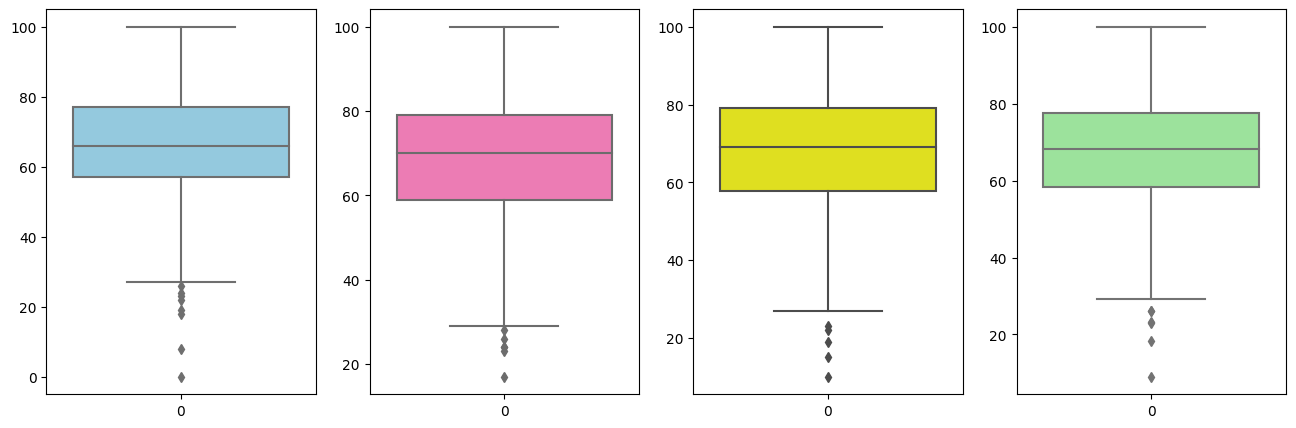

In [22]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

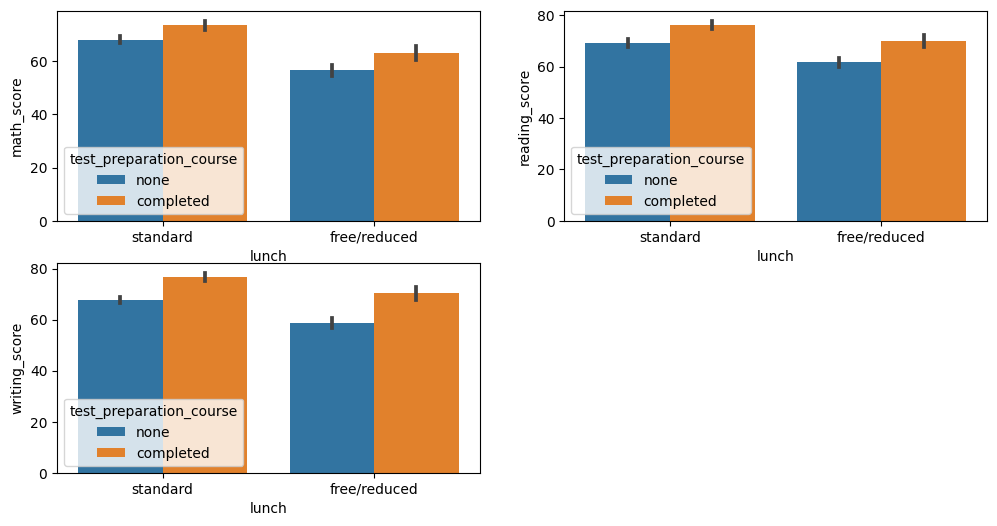

In [23]:
### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )¶

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])